Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

Loading the Dataset

In [ ]:
shark_tank = pd.read_csv('/content/Shark Tank India.csv')

Exploratory Data Analysis (EDA)

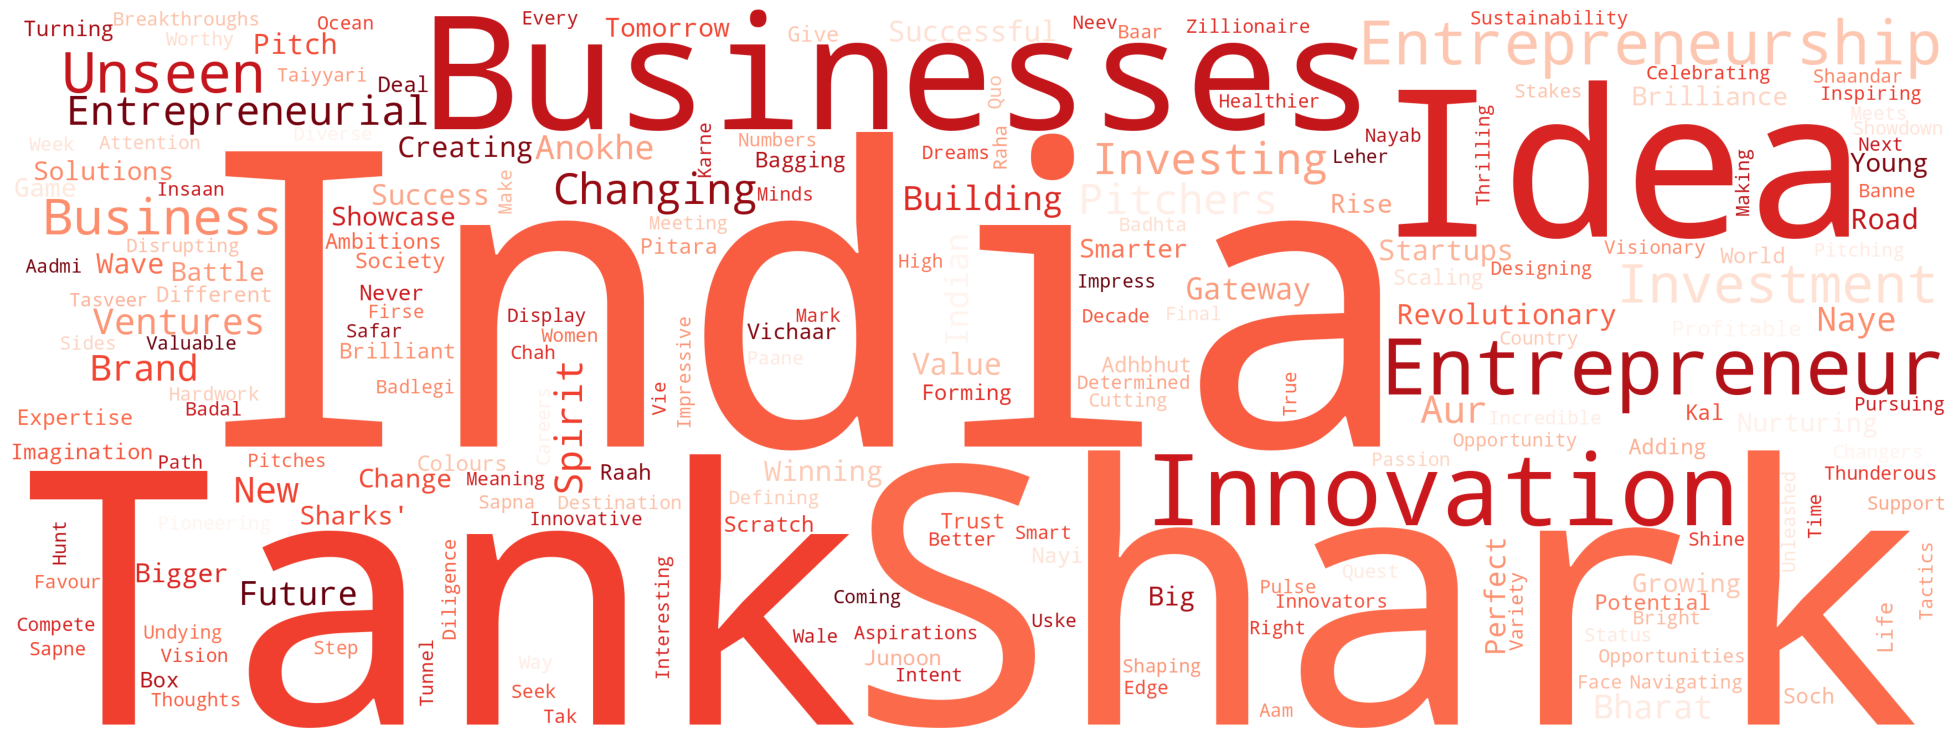

In [ ]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank.loc[shark_tank['Episode Title'].notnull()]['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ke", "Ko", "Se", "Hai", "Ek"]
wordcloud = WordCloud(width=3500, height=1300, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2024).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
shark_tank.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,Business Description,Company Website,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food,Frozen Momos,https://bluepinefoods.com/,2016.0,3,2.0,1.0,NaN,0.0,Middle,Delhi,Delhi,95.0,8.0,NaN,NaN,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,2017.0,1,1.0,NaN,NaN,0.0,Young,Ahmedabad,Gujarat,4.0,0.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,2021.0,1,NaN,1.0,NaN,0.0,Young,Delhi,Delhi,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2019.0,2,2.0,NaN,NaN,0.0,Middle,Bangalore,Karnataka,700.0,NaN,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.75,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Education,Brain Development Course,https://thehnh.in/,2015.0,4,1.0,3.0,NaN,1.0,Middle,Patiala,Punjab,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN


In [ ]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              478 non-null    int64  
 1   Startup Name               478 non-null    object 
 2   Episode Number             478 non-null    int64  
 3   Pitch Number               478 non-null    int64  
 4   Season Start               478 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          447 non-null    object 
 7   Episode Title              478 non-null    object 
 8   Anchor                     478 non-null    object 
 9   Industry                   478 non-null    object 
 10  Business Description       478 non-null    object 
 11  Company Website            466 non-null    object 
 12  Started in                 355 non-null    float64
 13  Number of Presenters       478 non-null    int64  

In [ ]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')


,count,mean,std,min,25%,50%,75%,max
Season Number,478.000000,2.010460,0.804791,1.000000,1.000000,2.000000,3.000000,3.000000
Episode Number,478.000000,23.182008,15.028357,0.000000,10.000000,23.000000,35.000000,52.000000
Pitch Number,478.000000,239.500000,138.130976,1.000000,120.250000,239.500000,358.750000,478.000000
Started in,355.000000,2018.904225,2.770274,1998.000000,2018.000000,2019.000000,2021.000000,2023.000000
Number of Presenters,478.000000,2.020921,0.821349,1.000000,1.000000,2.000000,2.000000,6.000000
Male Presenters,412.000000,1.679612,0.819039,1.000000,1.000000,1.000000,2.000000,6.000000
Female Presenters,226.000000,1.199115,0.421847,1.000000,1.000000,1.000000,1.000000,3.000000
Transgender Presenters,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Couple Presenters,473.000000,0.177590,0.382572,0.000000,0.000000,0.000000,0.000000,1.000000
Yearly Revenue,241.000000,557.033195,1501.919516,0.000000,72.000000,170.000000,460.000000,18700.000000


In [ ]:
shark_tank.isnull().sum()

,0
Season Number,0
Startup Name,0
Episode Number,0
Pitch Number,0
Season Start,0
Season End,0
Original Air Date,31
Episode Title,0
Anchor,0
Industry,0


In [ ]:
shark_tank.duplicated().sum()

0

In [ ]:
shark_tank.nunique()

,0
Season Number,3
Startup Name,478
Episode Number,53
Pitch Number,478
Season Start,3
Season End,3
Original Air Date,137
Episode Title,138
Anchor,3
Industry,17


In [ ]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())
shark_tank['Number of Presenters'] = shark_tank['Number of Presenters'].astype(pd.Int32Dtype())
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Transgender Presenters'] = shark_tank['Transgender Presenters'].astype(pd.Int32Dtype())
shark_tank['Couple Presenters'] = shark_tank['Couple Presenters'].astype(pd.Int32Dtype())
shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)
shark_tank['Gross Margin'] = shark_tank['Gross Margin'].astype(pd.Int32Dtype())
shark_tank['Net Margin'] = shark_tank['Net Margin'].astype(pd.Int32Dtype())
shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())
shark_tank['Received Offer'] = shark_tank['Received Offer'].astype(pd.Int32Dtype())
shark_tank['Accepted Offer'] = shark_tank['Accepted Offer'].astype(pd.Int32Dtype())

In [ ]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#4682B4","color":"white","border": ".75px solid black", 'font-size': '10pt'})

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,Business Description,Company Website,Started in,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,EBITDA,Cash Burn,SKUs,Has Patents,Bootstrapped,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of Sharks in Deal,Deal Has Conditions,Royalty Deal,Advisory Shares Equity,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Guest Present
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2019,2,2,,,0,Middle,Bangalore,Karnataka,700,nan,48,,nan,nan,nan,nan,nan,70.000000,1.000000,7000.000000,1,1,70.000000,2.750000,nan,nan,2545.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,70.000000,2.750000,nan,nan,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,nan,nan,1.000000,nan
351,3,GudGum,11,352,22-Jan-24,31-Mar-24,5-Feb-24,Disrupting The Status Quo,Rahul Dua,Food,Healthy Chewing Gum brand,https://gudgum.in/,2022,2,2,,,0,Young,Bangalore,Karnataka,,nan,,,nan,nan,9.000000,nan,nan,50.000000,5.000000,1000.000000,1,1,80.000000,10.000000,nan,nan,800.000000,4.000000,nan,1.000000,nan,nan,nan,nan,20.000000,2.500000,nan,20.000000,2.500000,nan,20.000000,2.500000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20.000000,2.500000,nan,Ritesh Aggarwal,Ritesh Aggarwal,1.000000,1.000000,1.000000,1.000000,nan,nan,nan,1.000000
264,2,HoloKitab,36,265,2-Jan-23,10-Mar-23,20-Feb-23,Anokhe Pitchers Ke Anokhe Ideas,Rahul Dua,Technology/Software,Augmented Reality content for books,https://www.holokitab.in/,,2,2,,,0,Middle,Jalandhar,Punjab,0,nan,,,nan,nan,nan,nan,nan,45.000000,10.000000,450.000000,1,1,45.000000,25.000000,nan,nan,180.000000,1.000000,yes,nan,nan,45.000000,25.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,nan,nan,nan
458,3,Rocca,46,459,22-Jan-24,31-Mar-24,25-Mar-24,Brands On The Rise,Rahul Dua,Food,Premium Chocolates,https://myrocca.in/,2019,2,1,1,,0,Young,Nagpur,Maharashtra,250,9.500000,60,,nan,nan,nan,nan,funded,60.000000,4.000000,1500.000000,1,1,30.000000,2.500000,30.000000,9.000000,1200.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,30.000000,2.500000,30.000000,Ritesh Aggarwal,Ritesh Aggarwal,nan,1.000000,1.000000,1.000000,1.000000,nan,nan,1.000000
271,2,nawgati,38,272,2-Jan-23,10-Mar-23,22-Feb-23,Innovation And Imagination,Rahul Dua,Services,Congestion Management for Fuel Stations,https://www.nawgati.com/,,3,3,,,0,Young,Noida,Uttar Pradesh,,nan,,,nan,nan,nan,nan,nan,67.000000,2.000000,3350.000000,1,1,67.000000,3.000000,nan,nan,2233.333333,2.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,33.500000,1.500000,nan,nan,nan,nan,33.500000,1.500000,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,1.000000,1.000000,1.000000,1.000000,nan,nan
370,3,Quirksmith,17,371,22-Jan-24,31-Mar-24,13-Feb-24,Innovation On Display,Rahul Dua,Beauty

Defining new terms


In [ ]:
shark_tank_season1 = shark_tank.loc[shark_tank['Season Number']==1]
shark_tank_season1_without_unseen = shark_tank.loc[(shark_tank['Season Number']==1) & (shark_tank['Episode Number']!=0)]
shark_tank_se# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - India SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))ason2 = shark_tank.loc[shark_tank['Season Number']==2]
shark_tank_season3 = shark_tank.loc[(shark_tank['Season Number']==3) | (shark_tank['Season Number'].isnull())]

In [ ]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Indian SharkTank \n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")
print("In Season 1, in", shark_tank_season1['Episode Number'].max(), "episodes, there were", shark_tank_season1.loc[shark_tank_season1['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season1.loc[shark_tank_season1['Episode Number']==0]['Startup Name'].count(),"unseen pitches\n")
print("In Season 2, in", shark_tank_season2['Episode Number'].max(), "episodes, there were", shark_tank_season2.loc[shark_tank_season2['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season2.loc[shark_tank_season2['Episode Number']==0]['Startup Name'].count(),"unseen pitch\n")
print("In Season 3, in", shark_tank_season3['Episode Number'].max(), "episodes, there were", shark_tank_season3.loc[shark_tank_season3['Episode Number']!=0]['Startup Name'].count(), "(real) pitches\n")

3 total seasons in Indian SharkTank 

478 #startups came for pitching 

In Season 1, in 36 episodes, there were 122 (real) pitches and 30 unseen pitches

In Season 2, in 51 episodes, there were 168 (real) pitches and 1 unseen pitch

In Season 3, in 52 episodes, there were 157 (real) pitches



Visualisation of the data

Season Number    1   2   3
Episode Number  36  51  52


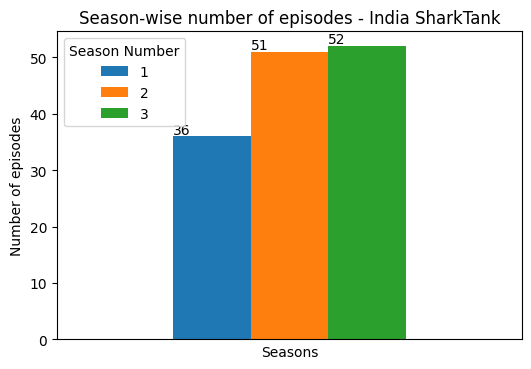

In [ ]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - India SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [ ]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

<ipython-input-38-549660edd531>:2: FutureWarning:

The provided callable <function mean at 0x7acfc38e7d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Season Number,1,2,3
Original Ask Amount,263,84,95
Total Deal Amount,57,66,73
Valuation Requested,4152,5991,5501
Deal Valuation,838,2407,3244
Original Offered Equity,5,3,3
Total Deal Equity,16,7,5


<ipython-input-42-399fed6f8e95>:2: FutureWarning:

The provided callable <function mean at 0x7acfc38e7d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



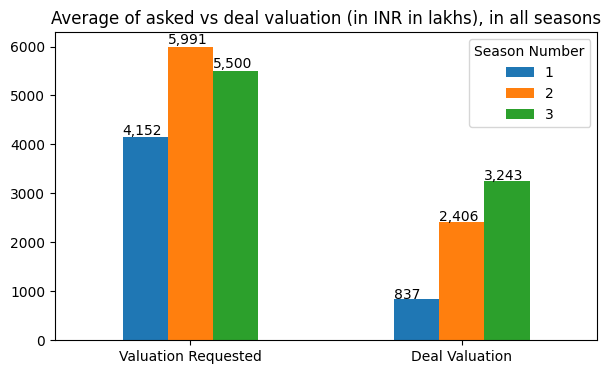

In [ ]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(7,4), title="Average of asked vs deal valuation (in INR in lakhs), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

Male entrepreneurs percentage - 71.64%

Female entrepreneurs percentage - 28.05%

Transgender entrepreneurs percentage - 0.31%

Couple entrepreneurs percentage - 9.0%




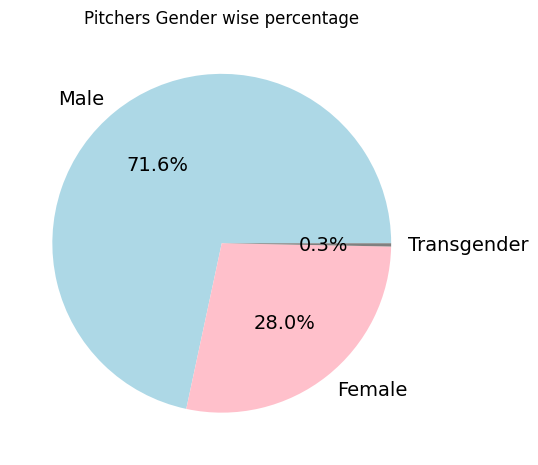

In [ ]:
print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Transgender entrepreneurs percentage - ", round(shark_tank['Transgender Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("")

fig = plt.figure(figsize =(9, 5.5))
plt.title("Pitchers Gender wise percentage")
plt.pie([round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), round(shark_tank['Transgender Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2)], labels = ["Male","Female","Transgender"], autopct='%.1f%%', colors=["lightblue", "pink", "gray"], textprops={'fontsize': 14})
plt.show()

Pitchers Average Age
Middle    357
Young     118
Old         3
Name: count, dtype: int64 

Pitchers Average Age
Middle    75%
Young     25%
Old        1%
Name: proportion, dtype: object 



Text(0, 0.5, '')

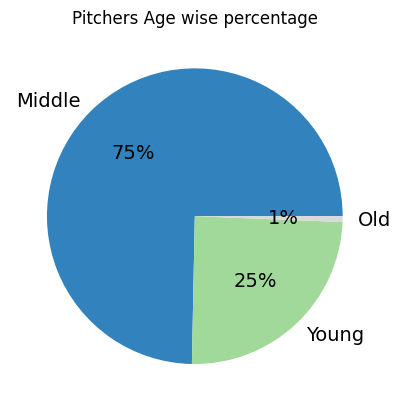

In [ ]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', fontsize=14)
plt.ylabel('')

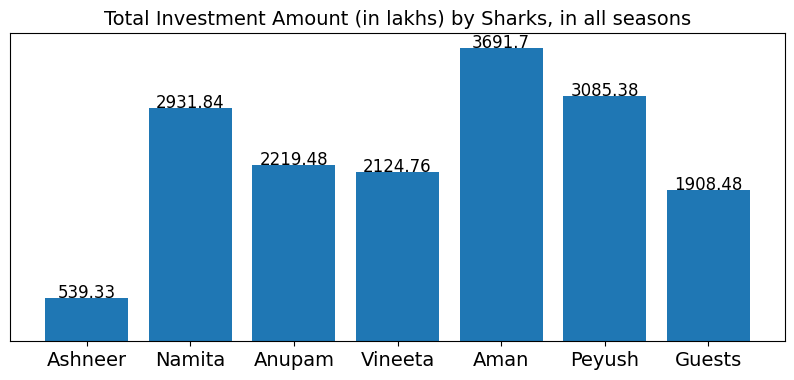

In [ ]:
# Amount Invested by sharks, in all seasons
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Guest Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush', 'Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in lakhs) by Sharks, in all seasons", fontsize=14)
plt.show()